In [14]:
import matplotlib.pyplot as plt
from Experiments.experiments import run_experiment, summarize, run_experiment_GD, summarize_GD

plt.rcParams.update({
    "font.family": "serif",
    "font.size": 10,
})

In [2]:
rows = run_experiment(
        n_values=(100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000),
        p_values=(0.01, 0.02),
        trials_per_setting=10,
        weight_range=(1.0, 10.0),
        seed=12345,
     )
summarize(rows)

Total rows: 220 | ok: 220 | mismatches: 0 | disconnected: 0

Averages (only ok runs):
n= 100 p=0.010 | time dijk=0.000012s time bi=0.000114s | relax dijk=19.1 relax bi=19.0
n= 100 p=0.020 | time dijk=0.000030s time bi=0.000091s | relax dijk=92.1 relax bi=49.1
n= 500 p=0.010 | time dijk=0.000362s time bi=0.000205s | relax dijk=1205.9 relax bi=143.7
n= 500 p=0.020 | time dijk=0.000437s time bi=0.000277s | relax dijk=1988.8 relax bi=264.3
n=1000 p=0.010 | time dijk=0.001020s time bi=0.000370s | relax dijk=5266.5 relax bi=451.5
n=1000 p=0.020 | time dijk=0.001358s time bi=0.000567s | relax dijk=9069.2 relax bi=751.2
n=1500 p=0.010 | time dijk=0.002137s time bi=0.000661s | relax dijk=12448.5 relax bi=904.6
n=1500 p=0.020 | time dijk=0.004624s time bi=0.001319s | relax dijk=27460.9 relax bi=1628.3
n=2000 p=0.010 | time dijk=0.003948s time bi=0.000940s | relax dijk=23207.0 relax bi=1210.9
n=2000 p=0.020 | time dijk=0.008720s time bi=0.002237s | relax dijk=43444.3 relax bi=2354.2
n=2500 p=0.01

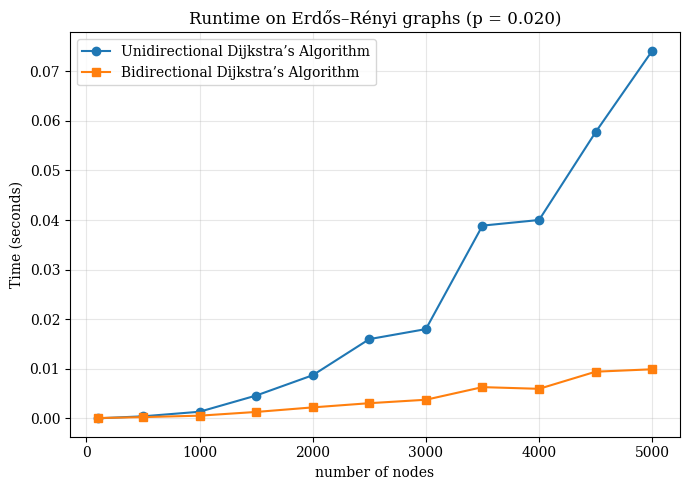

In [15]:
# Data
n = [100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]

time_dijk = [
    0.000030,
    0.000437,
    0.001358,
    0.004624,
    0.008720,
    0.016000,
    0.018022,
    0.038887,
    0.040020,
    0.057749,
    0.074150,
]

time_bi = [
    0.000091,
    0.000277,
    0.000567,
    0.001319,
    0.002237,
    0.003085,
    0.003778,
    0.006323,
    0.005982,
    0.009436,
    0.009921,
]

# Plot
plt.figure(figsize=(7, 5))

plt.plot(n, time_dijk, marker="o", label="Unidirectional Dijkstra’s Algorithm")
plt.plot(n, time_bi, marker="s", label="Bidirectional Dijkstra’s Algorithm")

plt.xlabel("number of nodes")
plt.ylabel("Time (seconds)")
plt.title("Runtime on Erdős–Rényi graphs (p = 0.020)")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("runtime_Erdos-Renyi.pdf", bbox_inches="tight")
plt.show()


In [4]:
rows = run_experiment_GD(
        D=(100, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500), 
        uniform_weight=1, 
        trials_per_setting=20, 
        other_weight_range=(1.0, 10.0), 
        seed=12345
        )
summarize_GD(rows)

Total runs: 220 | ok: 220 | mismatches: 0

Per-D summary (only ok runs):
D= 100 | shortcut_rate=100.00% | time cheap=0.000112s (non-shortcut avg=nans) | time bidir=0.004205s | bidir relax(avg)=6795.4
D= 250 | shortcut_rate=100.00% | time cheap=0.000299s (non-shortcut avg=nans) | time bidir=0.029263s | bidir relax(avg)=48505.5
D= 500 | shortcut_rate=100.00% | time cheap=0.000619s (non-shortcut avg=nans) | time bidir=0.090031s | bidir relax(avg)=137305.3
D= 750 | shortcut_rate=100.00% | time cheap=0.000952s (non-shortcut avg=nans) | time bidir=0.279074s | bidir relax(avg)=436805.5
D=1000 | shortcut_rate=100.00% | time cheap=0.001283s (non-shortcut avg=nans) | time bidir=0.461898s | bidir relax(avg)=719205.5
D=1250 | shortcut_rate=100.00% | time cheap=0.001562s (non-shortcut avg=nans) | time bidir=0.776171s | bidir relax(avg)=1189130.4
D=1500 | shortcut_rate=100.00% | time cheap=0.001884s (non-shortcut avg=nans) | time bidir=1.010030s | bidir relax(avg)=1560305.6
D=1750 | shortcut_rate=10

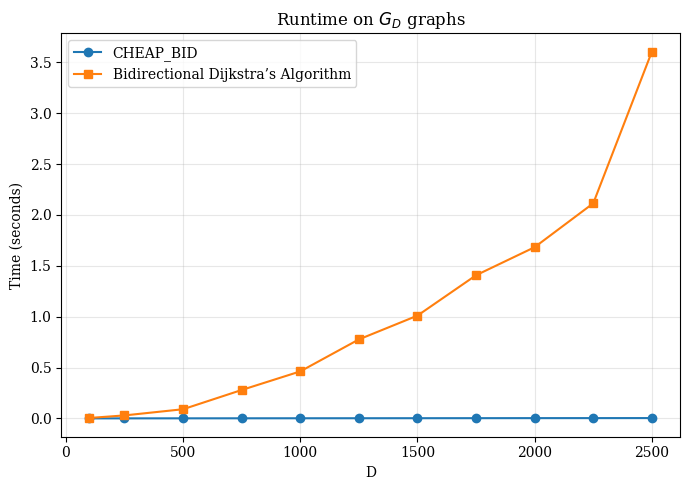

In [16]:
# Data
D = [100, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500]

time_cheap = [
    0.000112,
    0.000299,
    0.000619,
    0.000952,
    0.001283,
    0.001562,
    0.001884,
    0.002232,
    0.002639,
    0.002802,
    0.003129,
]

time_bidir = [
    0.004205,
    0.029263,
    0.090031,
    0.279074,
    0.461898,
    0.776171,
    1.010030,
    1.407007,
    1.682790,
    2.114095,
    3.604173,
]

# Plot
plt.figure(figsize=(7, 5))

plt.plot(D, time_cheap, marker="o", label="CHEAP_BID")
plt.plot(D, time_bidir, marker="s", label="Bidirectional Dijkstra’s Algorithm")

plt.xlabel("D")
plt.ylabel("Time (seconds)")
plt.title("Runtime on $G_D$ graphs")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("runtime_GD.pdf", bbox_inches="tight")
#plt.close()
plt.show()